<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/3_1_gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load and process data
from scipy import linalg
import numpy as np
import pandas as pd

# Graphics/plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn import mixture # <- this contains the GMM

import itertools
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

## Mickey Mouse Dataset

Each small error should be its own cluster separate from the big face.

<Axes: xlabel='x', ylabel='y'>

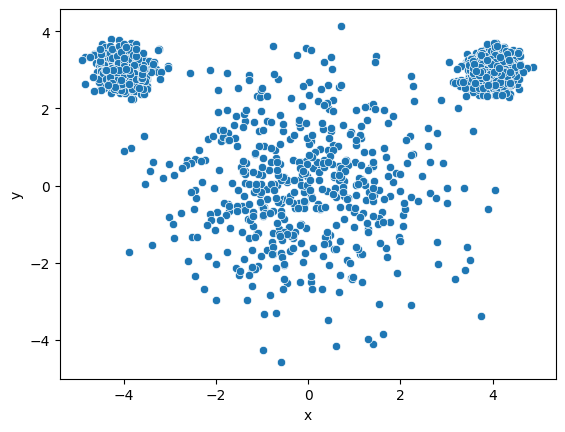

In [ ]:
n_samples = 500 # Samples in each initial Gaussian

# Generate random sample, two components
np.random.seed(0)

X = np.r_[
    1.5 * np.random.randn(n_samples, 2) + np.array([0, 0]),
    0.3 * np.random.randn(n_samples, 2) + np.array([-4, 3]),
    0.3 * np.random.randn(n_samples, 2) + np.array([4, 3]),
]
X_df = pd.DataFrame(data=X, columns=["x","y"])

sns.scatterplot(data=X_df, x="x", y="y")

### K-Means Clustering


In [ ]:
# TODO: Fit k-means clustering with 3 clusters
num_clusters = 3
km = KMeans(n_clusters=num_clusters, init='random', verbose=1)
km.fit(X)

Initialization complete
Iteration 0, inertia 10359.883390720224.
Iteration 1, inertia 5642.433127535333.
Iteration 2, inertia 2910.8184129455362.
Iteration 3, inertia 2153.2995952961564.
Iteration 4, inertia 2112.391543398412.
Iteration 5, inertia 2108.2574461754148.
Iteration 6, inertia 2107.3239238882097.
Converged at iteration 6: center shift 0.0004901019151806533 within tolerance 0.0007103731176575082.
Initialization complete
Iteration 0, inertia 12023.469365297035.
Iteration 1, inertia 2966.6667211790937.
Iteration 2, inertia 2147.2312610588083.
Iteration 3, inertia 2107.339215951524.
Iteration 4, inertia 2106.0662378478028.
Converged at iteration 4: center shift 0.000168059901233986 within tolerance 0.0007103731176575082.
Initialization complete
Iteration 0, inertia 38708.27540343965.
Iteration 1, inertia 8427.661639254069.
Iteration 2, inertia 7506.280642627944.
Iteration 3, inertia 6937.906533799646.
Iteration 4, inertia 4293.099845595514.
Iteration 5, inertia 2441.384193653158

KMeans(init='random', n_clusters=3, verbose=1)

<Axes: xlabel='x', ylabel='y'>

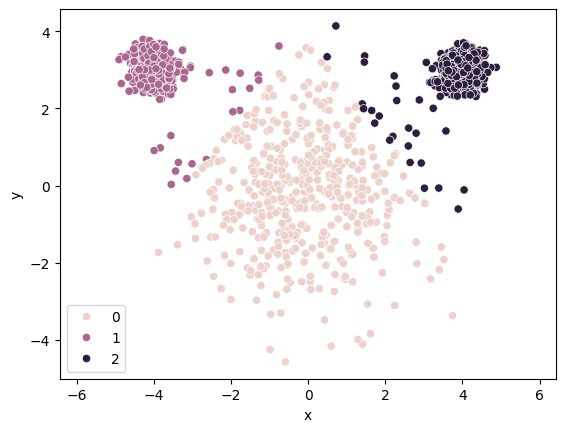

In [ ]:
plt.axis('equal')
sns.scatterplot(data=X_df, x="x", y="y", hue=km.labels_)

K-means does okay, but it does not cleanly separate the "ear" clusters on their own.

### GMM

In [ ]:
# TODO: Fit a Gaussian mixture with EM
gmm = mixture.GaussianMixture(n_components=3, covariance_type="full").fit(X)

In [ ]:
gmm_labels = gmm.predict(X)

In [ ]:
gmm_labels

array([2, 2, 2, ..., 0, 0, 0])

<Axes: xlabel='x', ylabel='y'>

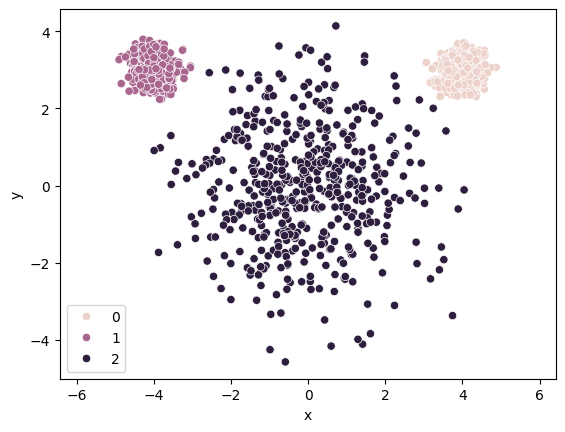

In [ ]:
plt.axis('equal')
sns.scatterplot(data=X_df, x="x", y="y", hue=gmm_labels)

GMM does work perfectly. It accurately identifies that the two clusters in each top corner have small variances, so it decreases their size while increasing the size of the central cluster.

K-Means cannot achieve this. It always assumes that the cluster boundary is halfway between the centroids.

## Anisotropic Clusters

Let's move to a case with two clear clusters. However, one of the clusters is anisotropic—it is stretched out and rotated.

<Axes: xlabel='x', ylabel='y'>

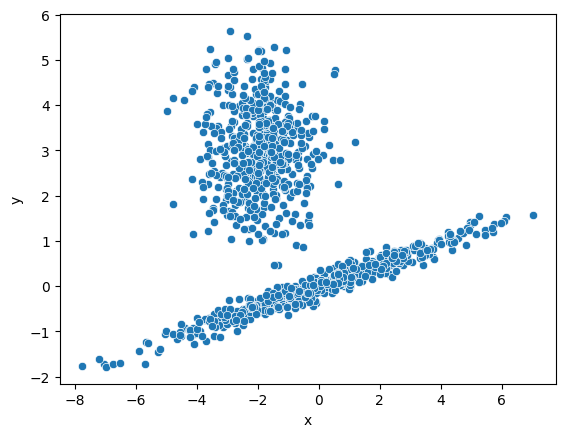

In [ ]:
n_samples = 500 #Samples in each initial gaussian

# Generate random sample, two components
np.random.seed(0)

rot1 = np.array([[0.0, -0.1], [1.7, 0.4]])
rot2 = np.array([[0.3, -0.1], [0.3, 1.4]])

X = np.r_[
    1.5 * np.random.randn(n_samples, 2)@rot1 + np.array([0, 0]),
    1.0 * np.random.randn(n_samples, 2) + np.array([-2, 3]),
]
X_df = pd.DataFrame(data=X,columns=["x","y"])

sns.scatterplot(data=X_df,x="x",y="y")

### K-Means

Initialization complete
Iteration 0, inertia 9739.434107969453.
Iteration 1, inertia 4484.480434033852.
Iteration 2, inertia 4281.424386180505.
Iteration 3, inertia 4184.476207545223.
Iteration 4, inertia 4140.310844653791.
Iteration 5, inertia 4122.582550413562.
Iteration 6, inertia 4107.936777677321.
Iteration 7, inertia 4101.108044610042.
Iteration 8, inertia 4098.243801207938.
Iteration 9, inertia 4097.087937738062.
Iteration 10, inertia 4095.938211136817.
Iteration 11, inertia 4095.728938951509.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 7186.529049030383.
Iteration 1, inertia 5820.053468589195.
Iteration 2, inertia 5794.548349861425.
Iteration 3, inertia 5778.2404581299015.
Iteration 4, inertia 5741.900377058235.
Iteration 5, inertia 5658.334915694235.
Iteration 6, inertia 5323.082219916259.
Iteration 7, inertia 4373.607769158247.
Iteration 8, inertia 4310.875995601134.
Iteration 9, inertia 4287.640407934662.
Iteration 10, inertia 

<Axes: xlabel='x', ylabel='y'>

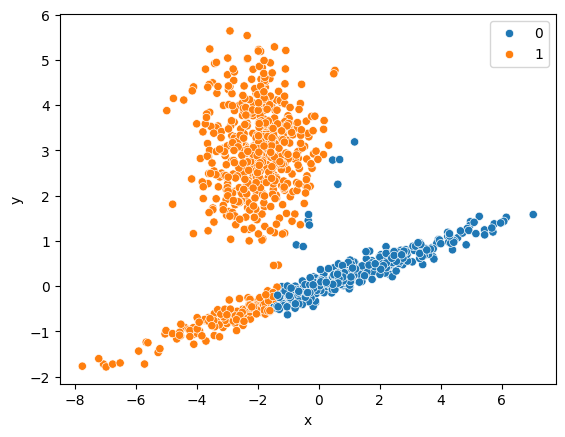

In [ ]:
# TODO: Fit k-measn clustering with 2 clusters
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', verbose=1)
km.fit(X_df)
sns.scatterplot(data=X_df, x = "x", y = "y", hue = km.labels_)

K-Means struggles with anisotropic clusters. It has a circular/isotropic built-in to its distance assumptions (Voronoi cells).

### GMM

<Axes: xlabel='x', ylabel='y'>

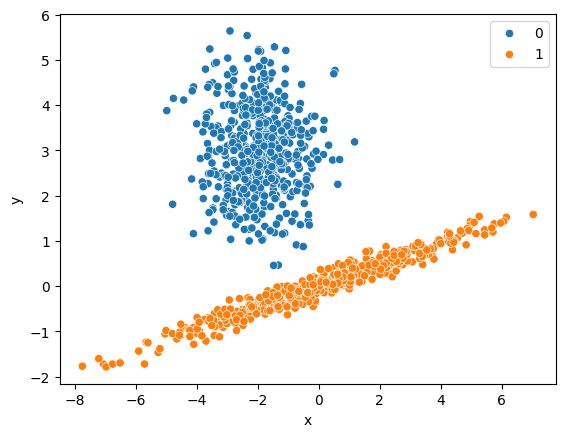

In [ ]:
# TODO: Fit a Gaussian mixture with EM with 2 guassians
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full").fit(X)
gmm_labels = gmm.predict(X) # cluster the data based on which gaussian is more likely
sns.scatterplot(data=X_df, x="x", y="y", hue=gmm_labels)

GMM does great if you get the number of clusters right.

If we try with too many clusters, it can still go wrong:

<Axes: xlabel='x', ylabel='y'>

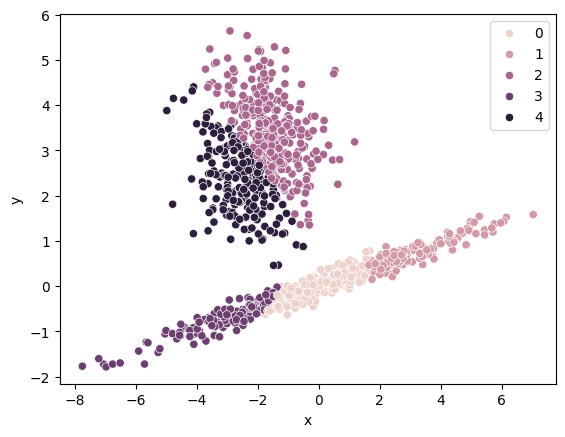

In [ ]:
# TODO: Fit a Gaussian mixture with EM with 5 gaussians
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(X)
gmm_labels = gmm.predict(X) # cluster the data based on which gaussian is more likely
sns.scatterplot(data=X_df, x="x", y="y", hue=gmm_labels)

To help with the number of clusters, we can use a Bayesian Gaussian Mixture Model. With this type of GMM, it is able to remove distributions it feels don't fit the data. This means you don't have to know exactly the right number of clusters since the model can pull the number down itself. You simply need to make a guess (always overestimate) and the Bayesian GMM will get you at least close to correct.

In [ ]:
# TODO: Fit a Dirichlet process Gaussian mixture with 3 components
dp_gmm = mixture.BayesianGaussianMixture(n_components=3, covariance_type="full").fit(X)
dp_gmm_labels = dp_gmm.predict(X)

In [ ]:
dp_gmm_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
set(dp_gmm_labels)

{np.int64(1), np.int64(2)}

<Axes: xlabel='x', ylabel='y'>

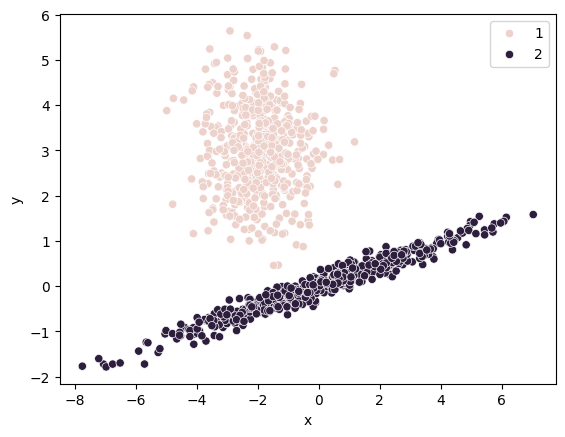

In [ ]:
sns.scatterplot(data=X_df, x="x", y="y", hue=dp_gmm_labels)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

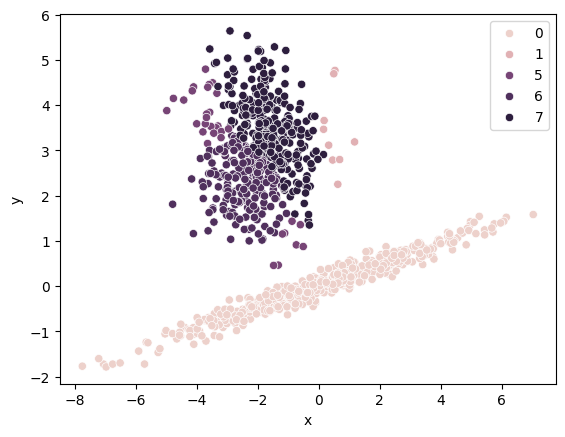

In [ ]:
# TODO: Fit a Dirichlet process Gaussian mixture with 10 components
dp_gmm = mixture.BayesianGaussianMixture(n_components=10, covariance_type="full").fit(X)
dp_gmm_labels = dp_gmm.predict(X)
sns.scatterplot(data=X_df, x="x", y="y", hue=dp_gmm_labels)

## Overlapping Clusters

As a final challenge, let's consider what happens when our clusters overlap each other.

<Axes: xlabel='x', ylabel='y'>

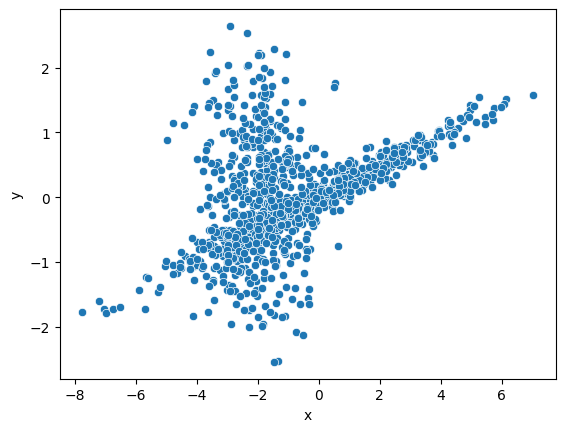

In [ ]:
n_samples = 500 # Samples in each initial Gaussian

# Generate random sample, two components
np.random.seed(0)

rot1 = np.array([[0.0, -0.1], [1.7, 0.4]])
rot2 = np.array([[0.3, -0.1], [0.3, 1.4]])

X = np.r_[
    1.5 * np.random.randn(n_samples, 2) @ rot1 + np.array([0, 0]),
    1.0 * np.random.randn(n_samples, 2) + np.array([-2, 0]),
]
X_df = pd.DataFrame(data=X, columns=["x","y"])

sns.scatterplot(data=X_df, x="x", y="y")

### K-Means

Initialization complete
Iteration 0, inertia 5251.24406785553.
Iteration 1, inertia 2369.514436028432.
Iteration 2, inertia 2284.9879836757063.
Iteration 3, inertia 2259.506014850379.
Iteration 4, inertia 2249.2579387165797.
Iteration 5, inertia 2246.4909323210427.
Iteration 6, inertia 2246.1596593777103.
Converged at iteration 6: strict convergence.


<Axes: xlabel='x', ylabel='y'>

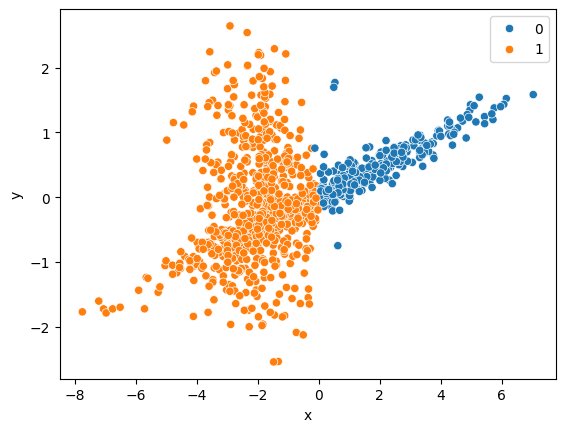

In [ ]:
# Fit k-means clustering
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=1, verbose=1)
km.fit(X_df)
sns.scatterplot(data=X_df, x="x", y="y", hue=km.labels_)

K-Means splits off one part of one of the clusters. There is clear room for improvement.

### GMM

<Axes: xlabel='x', ylabel='y'>

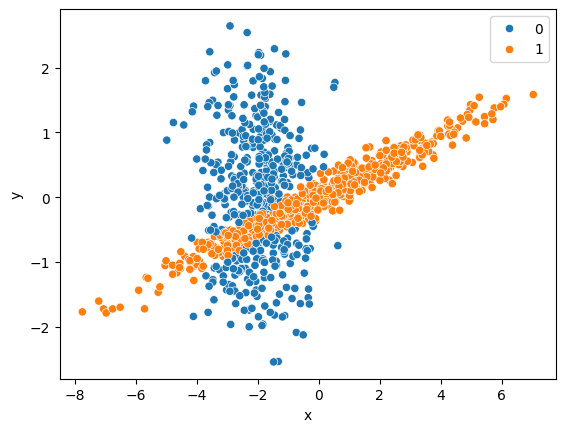

In [ ]:
# Fit a Gaussian mixture with EM
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full").fit(X)
gmm_labels = gmm.predict(X) # Cluster new data
sns.scatterplot(data=X_df, x="x", y="y", hue=gmm_labels)

GMM does perfect. It correctly creates a non-consecutive cluster. Any ambiguous points are given very reasonable labels.